**Nama :** Difa Fisabilillah

**Kode Peserta :** PYTN-KS18-017

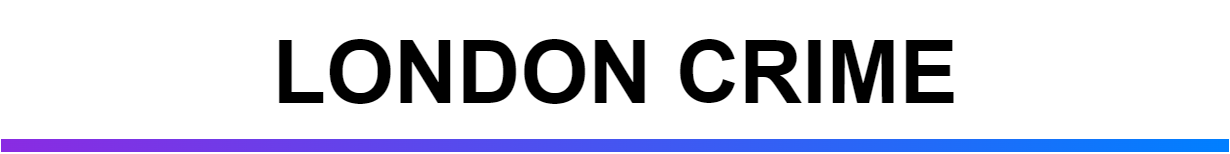

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from wordcloud import WordCloud, STOPWORDS
pd.set_option('display.max.columns', 500)
mpl.style.use(['ggplot'])

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
cd 'drive/MyDrive/Hacktiv8/'

[Errno 2] No such file or directory: 'drive/MyDrive/Hacktiv8/'
/content/drive/MyDrive/Hacktiv8


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **Checking The Data / Data Processing**

---



In [136]:
# Load data
df=pd.read_csv('../Hacktiv8/London Crime/london_crime_by_lsoa.csv')

In [137]:
# Tampilan data
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [138]:
# mengetahui jumlah baris dan kolom
df.shape

(13490604, 7)

In [139]:
# memeriksa tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [140]:
# Memeriksa null value pada tiap kolom
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Pada dataset london_crime_by_lsoa.csv memiliki 13.490.604 baris dan 7 kolom dengan 3 kolom diantaranya bertipe numerik (integer) dan 5 kolom diantara bertipe string. Dataset ini tidak memiliki null value.

In [141]:
# Memeriksa berapa macam wilayah yang ada di kolom 'borough'
df['borough'].nunique()

33

 Pada data ini terdapat 33 wilayah di London yang masuk pada pengamatan tindak kriminal. Dengan daftar wilayah sebagai berikut :

In [142]:
# mengelompokkan data wilayah pada kolom borough pada data df
list_of_boroughs = df.groupby('borough').size().reset_index()['borough']
print("List of London Borough:")
# iterasi melalui data kolom borough dari data list_of_boroughs unutk dicetak.
for wilayah in list_of_boroughs:
    print(wilayah)


List of London Borough:
Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
City of London
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **Line Plot**

---



**Problem Question :**

Pada tahun berapa tindak kejahatan di London paling tinggi ?



Membuat dataset baru bernama df_annual_crime untuk menghitung data kriminalitas tahunan.

In [143]:
# mengambil kolom year dan value dari df
df_annual_crime= df[['year','value']]
df_annual_crime.head()

,year,value
0,2016,0
1,2016,0
2,2015,0
3,2016,0
4,2008,0


Mengelompokkan kolom `tahun` dan `value` untuk mendapatkan nilai total kriminal mulai dari tahun 2008 - 2016.

In [144]:
# mengelompokkan tahun di data df untuk menjumlahkan data value
df_annual_crime=df_annual_crime.groupby('year')['value'].sum()
df_annual_crime

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

In [145]:
# Mencari tahun yang memiliki jumlah kriminal terbanyak
df_annual_crime.idxmax()

2008

In [146]:
data = {'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
        'Number_of_Crime': [738641, 717214, 715324, 724915, 737329, 686407, 680183, 711624, 736121]}

df_annual_crime=pd.DataFrame(data)
df_annual_crime.set_index('Year', inplace=True)

Dari data yang ada, dibuat visualisasi tahunan menggunakan line plot untuk melihat perubahan nilai tindak kriminal dari tahun 2008 - 2016

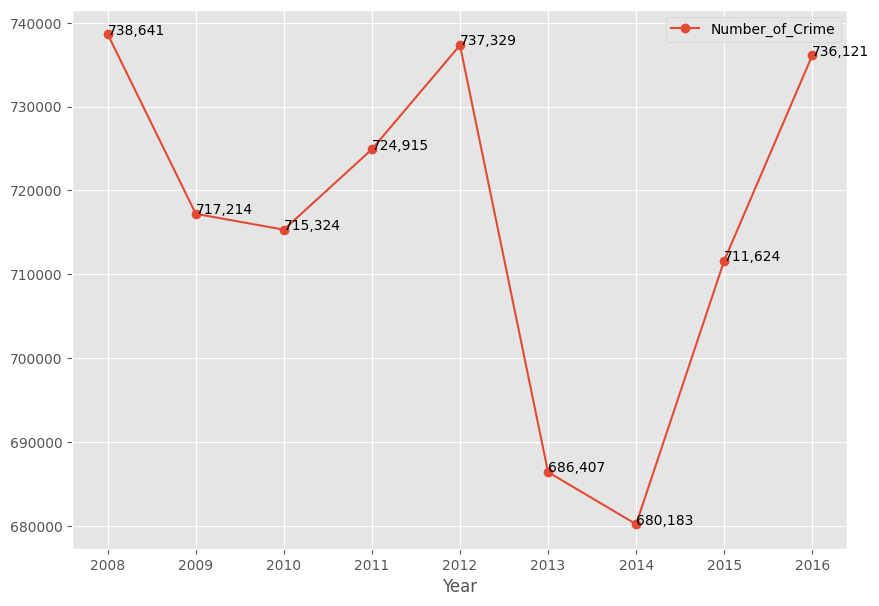

In [147]:
df_annual_crime.plot(kind='line', marker='o', figsize=(10,7))

for i, value in enumerate(df_annual_crime.Number_of_Crime):
  label=format(int(value), ',')
  plt.annotate(label, xy=(df_annual_crime.index[i], value) )
plt.show()

Data menunjukkan bahwa tahun 2008 merupakan puncak kriminalitas tertinggi dengan angka 738.641 sepanjang tahun 2008 - 2016. Setelahnya nilai tersebut mengalami penurunan sepanjang 2 tahun yaitu 2009 dan 2010. Tetapi terjadi lonjakan pada tahun 2012 yaitu 737.329. Tahun 2014 adalah tahun dimana tindak kejahatan di London memiliki angka paling rendah yaitu 680.183

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **Area Plot**

---


**Problem Question :**

Bagaimana perbandingan tidak kejahatan pada beberapa wilayah di London ?

In [148]:
# Agregasi data value berdasarkan kolom `borough` dan `year` untuk ditotal
df_crime_area = df.groupby(['year', 'borough']).agg({'value': 'sum'}).reset_index()
df_crime_area

,year,borough,value
0,2008,Barking and Dagenham,17656
1,2008,Barnet,23944
2,2008,Bexley,15305
3,2008,Brent,23504
4,2008,Bromley,24015
...,...,...,...
292,2016,Sutton,10658
293,2016,Tower Hamlets,29253
294,2016,Waltham Forest,20716
295,2016,Wandsworth,23679


Membuat `pivot table` untuk mengatur posisi data agar lebih mudah dianalisis, dengan `borough` sebagai `index` dan `year` sebagai `kolomnya`, dan untuk nilainya akan diisi oleh data kolom value

In [149]:
# Membuat pivot table
pivot_df_crime_area=df_crime_area.pivot(index='borough', columns='year', values='value')

Menambahkan kolom baru bernama kolom total untuk menjumlah nilai value pada index borough tiap tahunnya.




In [150]:
# Membuat kolom total
pivot_df_crime_area['total']=pivot_df_crime_area.sum(axis=1)

Mengurutkan data pivot_df_crime_area secara descending berdasarkan kolom total untuk mengetahui wilayah mana yang memiliki angka tindak kriminal paling tinggi





In [151]:
pivot_df_crime_area.sort_values(by='total', ascending=False, inplace=True)
pivot_df_crime_area

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562
Islington,26273,25485,24693,24980,26268,23784,24679,27032,27092,230286
Tower Hamlets,23578,21959,23072,24712,26784,26258,25504,27493,29253,228613


Menghapus kolom total agar nilai dari kolom ini tidak akan di visualisasikan, hal ini diperlukan agar visualisasi data tidak terlihat ambigu.

In [152]:
pivot_df_crime_area.drop('total', axis=1, inplace=True)

Membuat dataset baru dari pivot_df_crime_area untuk mengambil 3 wilayah yang memiliki nilai paling tinggi.

In [153]:
top3_highest_regions=pivot_df_crime_area.head(3)

Memvisulasisasikan top3_highest_regions dengan menggunakan area plot. Dilakukan traspose agar kategori yang dibandingkan adalah wilayah bukan tahun

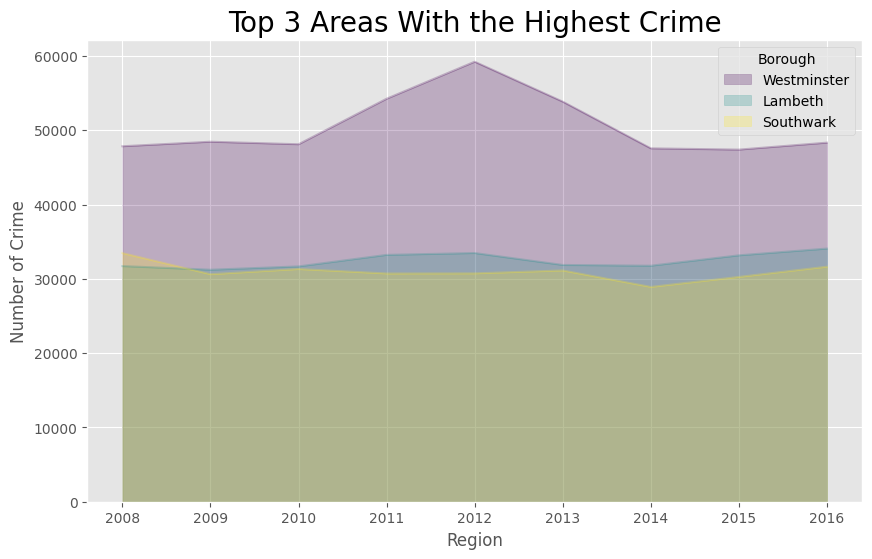

In [154]:
# visualisasi area plot
ax = top3_highest_regions.T.plot(kind='area', stacked=False, alpha=0.25,  figsize=(10,6), cmap='viridis')
ax.legend(title='Borough')

plt.title('Top 3 Areas With the Highest Crime' , fontsize=20)
plt.ylabel('Number of Crime')
plt.xlabel('Region')
plt.show()

Dari visualisasi ini, Westminster, Lambeth, Southwark adalah 3 wilayah dengan angka kriminalitas tertinggi dari 33 wilayah yang ada di London. Southwark dan Lambeth memiliki angka kriminalitas yang cenderung signifikan dari tahun ketahun yaitu sekitar 27.000 sampai 34.000 tindak kejahatan

In [155]:
pivot_df_crime_area['total']=pivot_df_crime_area.sum(axis=1)

In [156]:
pivot_df_crime_area.sort_values(by='total', ascending=True, inplace=True)
pivot_df_crime_area

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
borough,,,,,,,,,,
City of London,0,0,0,69,157,110,115,151,178,780
Kingston upon Thames,10661,10163,10171,10155,9956,9191,9288,9738,9983,89306
Richmond upon Thames,11106,10618,10601,10896,11168,10439,10456,10413,11074,96771
Sutton,12943,12240,12032,11068,10948,10057,10443,10598,10658,100987
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Merton,13875,13561,13595,13548,12856,11595,11596,12273,12755,115654
Harrow,13774,13948,13945,12801,12803,11914,11909,12601,13153,116848
Havering,15395,14538,14957,15496,15965,15089,14734,15870,16903,138947
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447


In [157]:
pivot_df_crime_area.drop('total', axis=1, inplace=True)

In [158]:
lowes_crime=pivot_df_crime_area.head(3)

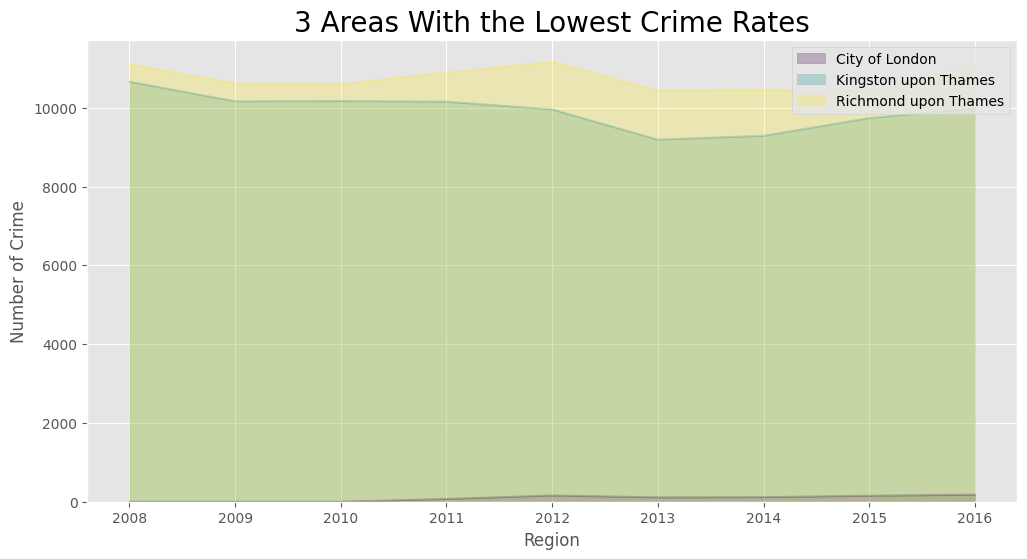

In [159]:
ax = lowes_crime.T.plot(kind='area', stacked=False, alpha=0.25,  figsize=(12,6), cmap='viridis')
ax.legend(loc='upper left', bbox_to_anchor=(0.75, 1))

plt.title('3 Areas With the Lowest Crime Rates' , fontsize=20)
plt.ylabel('Number of Crime')
plt.xlabel('Region')
plt.show()

Wilayah 'City of London' adalah wilayah yang memiliki tingkat kriminal yang sangat rendah sepanjang tahun 2008 - 2016 dengan angka 0 - 178 tindak kriminal. Tahun 2016 adalah nilai tertinggi tindak kejahatan di wilayah 'City of London' yaitu 178 tindak kriminal.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **Histogram**

---



**Problem Question :**

Berapa interval kejadian / tindak kejahatan pada beberapa wilayah di London ?

Inisialisasi kembali data pivot_df_crime_area untuk di urutkan secara descending kembali karena sebelumnya data ini sudah berubah saat memvisualisasikan 3 wilayah yang memiliki niali kriminalitas terrendah.

In [160]:
# Membuat pivot tabel dari df_crime_area
pivot_df_crime_area=df_crime_area.pivot(index='borough', columns='year', values='value')

In [161]:
# Menambahkan kolom total pada data pivot_df_crime_Are
pivot_df_crime_area['total']=pivot_df_crime_area.sum(axis=1)

In [162]:
#  mengurutkan data pivot_df_crime_area secara descending
pivot_df_crime_area.sort_values(by='total', ascending=False, inplace=True)
pivot_df_crime_area

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562
Islington,26273,25485,24693,24980,26268,23784,24679,27032,27092,230286
Tower Hamlets,23578,21959,23072,24712,26784,26258,25504,27493,29253,228613


In [163]:
# menghapus kolom total dari pivot_df_crime_area
pivot_df_crime_area.drop(['total'], axis=1, inplace=True)

In [164]:
# menampilkan 5 wilayah tertinggi dari data top5_crime
top5_crime= pivot_df_crime_area.head()
top5_crime

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090


Melakukan traspose pada data top5_crime agar visualisasi nantinya akan menunjukkan perbandingan interval berdasarkan data borough (wilayah) bukan data year (tahun)

In [165]:
# transpose data top5_crime
transpose_top5_crime = top5_crime.T
transpose_top5_crime

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


Melakukan visualisasi menggunakan histogram pada data transpose_top5_crime, untuk melihat perbandingan interval kejadian di 5 wilayah London

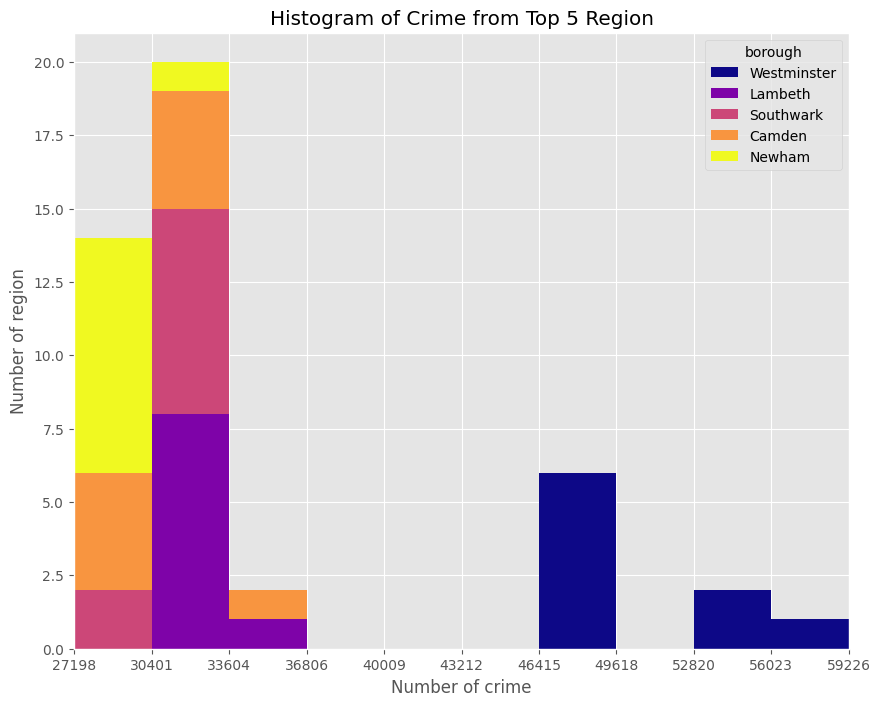

In [166]:
# menghitung frekuensi  dengan 10 bins
count,bin_edges = np.histogram(transpose_top5_crime,10)

# nilai minimum dan maksimum sumbu x pada plot
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

# membuat histogram transpose_top5_crime
transpose_top5_crime.plot(kind='hist',
                figsize=(10,8),
                bins=10,
                xticks=bin_edges,
                cmap='plasma',
                stacked=True,
                xlim=(xmin,xmax)
                )

plt.title('Histogram of Crime from Top 5 Region')
plt.ylabel('Number of region')
plt.xlabel('Number of crime')
plt.show()

Wilayah Newham memiliki frekuensi kejadian tertinggi yaitu 20 kejadian pada interval 30.401 - 33604 (tindak kriminal) pada tahun 2008 - 2016. Interval kejadian pada wilayah Westminster adalah 46415-59226 (tindak kriminal), sehingga menjadikan Westminster adalah wilayah paling tidak aman di London.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **Bar Chart**

---




**Problem Question :**

Pada tahun berapa angka kriminalitas paling tinggi wilayah Westminster ?

inisialisasi variabel years untuk membuat list tahun (2008 - 2016)

In [167]:
years=list(map(str, range(2008,2017)))
years

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [168]:
top5_crime.index=list(map(str, top5_crime.index))

In [169]:
top5_crime

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090


Karena Westminster memiliki data kriminal paling tinggi dari 33 wilayah lainnya. Maka untuk mencari tahun berapa puncak kriminalitas di Westminster terjadi, dilakukan inisialisasi variabel baru (`wesminster_data`) untuk mengambil data westminster yang sebagai `index` di data `top5_crime` dengan kriteria tahun 2008 - 2016

In [170]:
westminster_data = top5_crime.loc['Westminster', 2008:2016]
westminster_data

year
2008    47846
2009    48456
2010    48116
2011    54243
2012    59226
2013    53852
2014    47564
2015    47395
2016    48330
Name: Westminster, dtype: int64

Dari data yang dihasilkan oleh `westminster_data` dapat dilakukan visualisasi dengan bar chart untuk menunjukan pada tahun berapa puncak kriminalitas tertinggi di Westminster.

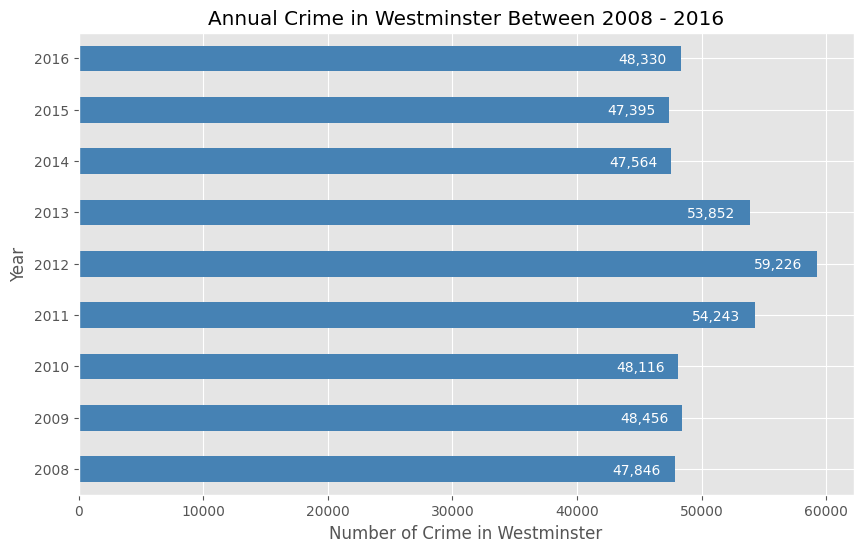

In [171]:
# membuat bar chart horizontal
westminster_data.plot(kind='barh', figsize=(10,6), color='steelblue')
plt.xlabel('Number of Crime in Westminster')
plt.ylabel('Year')
plt.title('Annual Crime in Westminster Between 2008 - 2016')

# Loop memberikan label nilai pada setiap bar
for index,value in enumerate(westminster_data):
  label=format(int(value),',') # format label dipisahkan dnegan koma
  plt.annotate(label,xy=(value-5000, index-0.10), color='white') # posisi label
plt.show()


Puncak kriminalitas di Westminster berada pada tahun 2012 dengan angka 59.226 kejadian.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **Pie Chart**

---



**Problem Question :**

Ada berapa macam kejahatan atau tindak kriminal di wilayah Westminster padat tahun 2012 ?

Untuk mencari berapa macam kategori kriminal yang ada di Westminster, diperlukan data kolom `major_category` dari df (dataset asli)

In [172]:
crime_category=df[['borough', 'major_category','value', 'year']]
crime_category

,borough,major_category,value,year
0,Croydon,Burglary,0,2016
1,Greenwich,Violence Against the Person,0,2016
2,Bromley,Violence Against the Person,0,2015
3,Redbridge,Burglary,0,2016
4,Wandsworth,Robbery,0,2008
...,...,...,...,...
13490599,Brent,Criminal Damage,0,2015
13490600,Hillingdon,Robbery,1,2015
13490601,Sutton,Burglary,0,2011
13490602,Croydon,Robbery,0,2011


Karena pada analisis sebelumnya ditemukan kesimpulan bahwa tahun 2012 adalah tahun puncak kriminalitas di wilayah Westminster, maka dari itu dilakukan filter data untuk menyaring data yang wilayahnya hanya Westminster saja dan pada tahun 2012.

In [173]:
#  filtering data year = 2012 & Westminster
crime_category_westminster_2012 = crime_category[(crime_category['year'] == 2012) & (crime_category['borough'] == 'Westminster')]
crime_category_westminster_2012

,borough,major_category,value,year
21,Westminster,Theft and Handling,0,2012
391,Westminster,Sexual Offences,0,2012
429,Westminster,Criminal Damage,0,2012
785,Westminster,Theft and Handling,1,2012
876,Westminster,Violence Against the Person,0,2012
...,...,...,...,...
13489145,Westminster,Violence Against the Person,2,2012
13489146,Westminster,Theft and Handling,0,2012
13489415,Westminster,Robbery,0,2012
13489599,Westminster,Theft and Handling,0,2012


In [174]:
crime_category_westminster_2012_copy=crime_category_westminster_2012.copy()

Untuk memvisualisasikan data kategorikal dari macam-macam tindak kriminal dari kolom `major_category`, data dari kolom `borough` dan `year` tidak diperlukan karena sudah dilakukan filter data sehingga datanya akan sama. Maka dari itu dilakukan droping data kolom `borough` dan `year`




In [175]:
#  drop kolom borough & year
crime_category_westminster_2012_copy.drop(['borough','year'], axis=1, inplace=True)

In [176]:
crime_category_westminster_2012_copy

,major_category,value
21,Theft and Handling,0
391,Sexual Offences,0
429,Criminal Damage,0
785,Theft and Handling,1
876,Violence Against the Person,0
...,...,...
13489145,Violence Against the Person,2
13489146,Theft and Handling,0
13489415,Robbery,0
13489599,Theft and Handling,0


Untuk mengetahui jumlah / angka kriminalitas dari tiap kategori dilakukan grouping data berdasarkan kolom `major_category` dengan menjumlahkan data dari kolom `value`

In [177]:
# mengelompokkan kolom major_category
group_crime_westminster=crime_category_westminster_2012_copy.groupby('major_category')['value'].sum()
group_crime_westminster

major_category
Burglary                        4083
Criminal Damage                 2254
Drugs                           4654
Fraud or Forgery                   0
Other Notifiable Offences        641
Robbery                         2312
Sexual Offences                    0
Theft and Handling             38152
Violence Against the Person     7130
Name: value, dtype: int64

Pada kolom major_category pada kategori *`'Fraud or Forgery' `*dan '*Sexual Offences*' adalah 0. Yang bearti tidak ada tindakan `*'Fraud or Forgery' *`dan `*'Sexual Offences'*` di wilayah Westminster pada tahun 2008 - 2016. Agar nilai 0 tersebut tidak muncul di pie chart, maka category tersebut di drop.

In [178]:
group_crime_westminster.drop(['Fraud or Forgery','Sexual Offences'], inplace=True)

Kemudian dilakukan visualisasi untuk mengetahui prosentase tiap kategori dilakuakn visualisasi dengan menggunakan pie chart

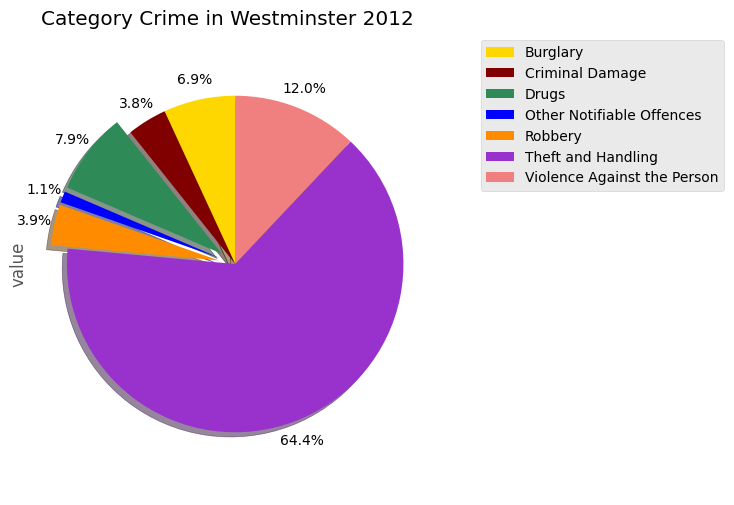

In [179]:
# list warna chart
colors_list = ['gold','maroon','seagreen','blue','darkorange','darkorchid','lightcoral']

# explode list
explode_list =[0,0,0.1,0.1,0.1,0,0]

# membuat pie chart
group_crime_westminster.plot(kind='pie',
                             figsize=(5,6),
                             autopct='%1.1f%%',
                             startangle=90,
                             shadow=True,
                             labels=None,
                             pctdistance=1.12,
                            colors=colors_list,
                            explode=explode_list
                             )
plt.title('Category Crime in Westminster 2012')
plt.axis('equal')
plt.legend(labels=group_crime_westminster.index, loc='upper right', bbox_to_anchor=(1.8, 1)) # legend dan posisi legend
plt.show()

*`'Theft and handling'`* adalah kejahatan tertinggi (64,4 % ) yang dilaporkan sepanjang tahun 2012 diikuti oleh *`'Violence Against the Person'`* (12%). Kejahatan terendah yang tercatat pada wilayah Westminster adalah *`'Other Notifiable Offences'`* atau pelanggaran umum lainnya.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **Box Plot**

---



**Problem Question :**

Bagaimana Gambaran rata-rata, angka tertinggi dan terrendah tindak kriminal pada 5 wilayah tertinggi terjadi kejahatan di London?

In [180]:
box_plot=top5_crime.copy()
box_plot

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090


Agar visualisasi yang digambarkan berdasarkan data wilayah / borough maka dilakukan transpose terhadap data top_crime

In [181]:
# Transpose box_plot
trans_box_plot=box_plot.T

<Axes: >

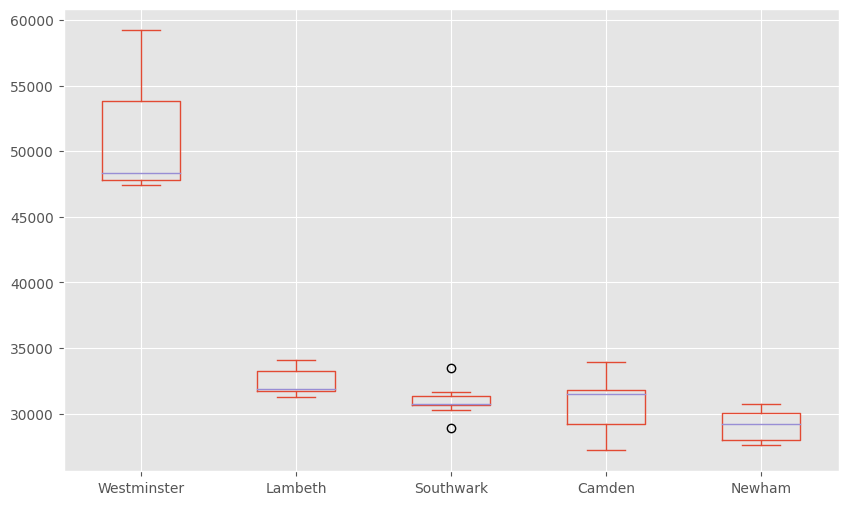

In [182]:
#  membuat visualisasi boxplot
trans_box_plot.plot(kind='box', figsize=(10,6))

Pada wilayah Camden, terlihat bahwa memiliki nilai minimum yang paling kecil dari ke 4 wilayah lainnya. untuk mengetahui nilai tersebut dapat dilakukan dengan menggunakan function `.describe()`.

In [183]:
trans_box_plot['Camden'].describe()

count        9.000000
mean     30571.888889
std       2121.547633
min      27198.000000
25%      29183.000000
50%      31472.000000
75%      31804.000000
max      33956.000000
Name: Camden, dtype: float64

Terdapat 2 outlier pada wilayah Southwark, untuk mengetahui mengapa terjadi outlier, harus diketahui terlebih dahulu limit lower dan upper outlier dari wilayah Shouthwark. Untuk itu nilai Q3 (75%) , Q1 (25 %) dan IQR harus diketahui.

In [184]:
trans_box_plot['Southwark'].describe()

count        9.000000
mean     30978.777778
std       1215.293049
min      28912.000000
25%      30623.000000
50%      30737.000000
75%      31320.000000
max      33470.000000
Name: Southwark, dtype: float64

In [185]:
Q3=31320
Q1=30623
# mencari selisih antara quartil 3 dengan quartil 1
IQR=Q3-Q1
IQR

697

Dengan nilai Q3 (quartil 3), Q1 ( quartil 1) dan IQR sudah diketahui, nilai lower dan upper limit akan dapat ditemukan.

In [186]:
# Lower limit = Q1 -(IQR*1.5)
lower_limit =  Q1 -(IQR*1.5)
lower_limit

29577.5

In [187]:
# upper limit
upper_limit = Q3 + (IQR*1.5)
upper_limit

32365.5

Nilai kriminalitas terendah dari top5_crime data berada di wilayah Camden dengan angka 27198. Rata-rata angka kejahatan di wilayah Camdem adalah 3057 dengan angka kriminalitas tertinggi adalah 33956 pada tahun 2011.


Pada wilayah Southwark terdapat 2 outlier, yang pertama adalah lower outlier, yang dimana titik ini akan muncul ketika terdapat angka dari suatu data yang lebih rendah dari batas bawah dari suatu boxplot. Batas bawah boxplot dari wilayah Southwark adalah 29577.5, sehingga nilai kriminal terendah yaitu 28912, sehingga angka ini dijadikan sebagai lower outlier karena nilai tersebut lebih rendah dari nilai lower limitnya.


Yang kedua adalah upper outlier, berkebalikan dengan lower outlier, nilai upper outlier melebihi nilai dari upper limit.




![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **Scatter Plot**

---



**Problem Question :**

Bagaimana perbandingan angka-angka tidak kejahatan dari 5 wilayah yang tindak kriminalitas tertinggi ?

In [188]:
top5_crime_total=top5_crime.copy()
top5_crime_total

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090


In [189]:
top5_crime_total.columns

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='object', name='year')

In [190]:
top5_crime_total.index

Index(['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham'], dtype='object')

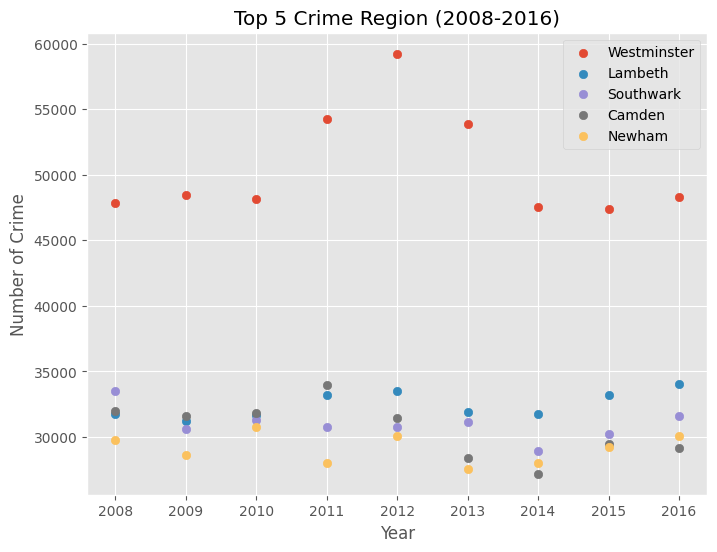

In [191]:
data = {
    'borough': ['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham'],
    '2008': [47846, 31717, 33470, 32010, 29752],
    '2009': [48456, 31225, 30623, 31612, 28610],
    '2010': [48116, 31671, 31320, 31804, 30728],
    '2011': [54243, 33224, 30723, 33956, 27978],
    '2012': [59226, 33473, 30737, 31472, 30067],
    '2013': [53852, 31868, 31128, 28435, 27577],
    '2014': [47564, 31765, 28912, 27198, 28005],
    '2015': [47395, 33164, 30260, 29477, 29217],
    '2016': [48330, 34071, 31636, 29183, 30090]
}

top5_crime_total_ = pd.DataFrame(data)

plt.figure(figsize=(8, 6))

#  iterasi scatter plot
for i, row in top5_crime_total_.iterrows():
    plt.scatter(top5_crime_total_.columns[1:],row[1:], label=row['borough'])

plt.xlabel('Year')
plt.ylabel('Number of Crime')
plt.title('Top 5 Crime Region (2008-2016)')

plt.legend()
plt.show()


Dari data top 5 region, menunjukkan bahwa wilayah Westminster memiliki angka kriminalitas paling tinggi dari 4 wilayah lain dari tahun 2008 - 2016

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# **Word Cloud**

---



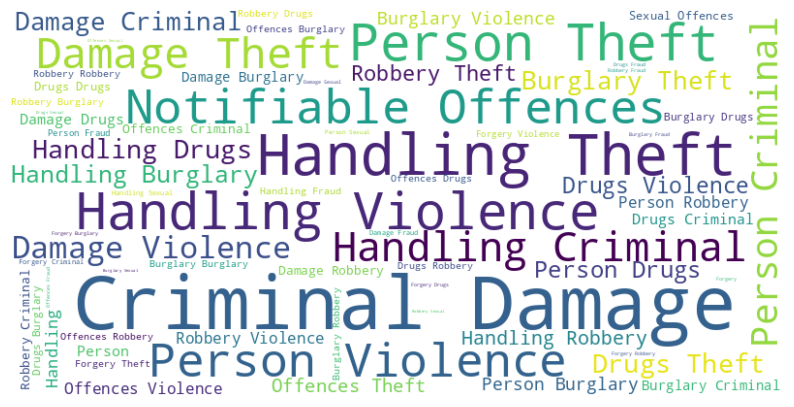

In [192]:
# Menggabungkan seluruh teks dari kolom 'major_category' menjadi satu teks
text = ' '.join(df['major_category'])
# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')

# Menghilangkan sumbu koordinat
plt.axis('off')

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Pada kolom major_category kategori, kategori yang paling sering muncul adalah Criminal Damage, Handling Theft, Handling Violence, Notifiable Offences, Person Theft Violence.

# **Folium Maps**

---



In [193]:
Latitude =	51.5072
Longitude =	-0.1275
london_map=folium.Map(location=[Latitude,Longitude], zoom_start=12)
london_map

Dengan Latitude =	51.5072,  Longitude =	-0.1275, Peta / Map London bisa ditampilkan

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)